# Intro

Original dataset [found here](https://www.openml.org/d/40536)

# Imports and Dataset Loading

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mutual_info_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

import xgboost as xgb

from IPython.display import display

from tqdm.auto import tqdm

%matplotlib inline

All the features that start with `d_` (except `d_age`) are categorical features that contain the interval the participant belongs to according to that particular score. For example, the numerical feature `importance_same_religion` contains a numerical score between 1 and 10; 3 or 4 groups are created according to those scores and the categorical feature `d_importance_same_religion` contains the group for any given user.

Due to the high amount of features, these categorical features have been removed from the get go in order to simplify the dataframe.

We're also removing `decision` and `decision_o`, because `match` is the result of a simple AND operation between these 2 features.

In [2]:
original_columns = ['has_null', 'wave', 'gender', 'age', 'age_o', 'd_age', 'd_d_age', 'race', 'race_o', 'samerace', 'importance_same_race', 'importance_same_religion', 'd_importance_same_race', 'd_importance_same_religion', 'field', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'd_attractive_important', 'd_sincere_important', 'd_intellicence_important', 'd_funny_important', 'd_ambtition_important', 'd_shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'd_attractive', 'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'd_sports', 'd_tvsports', 'd_exercise', 'd_dining', 'd_museums', 'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading', 'd_tv', 'd_theater', 'd_movies', 'd_concerts', 'd_music', 'd_shopping', 'd_yoga', 'interests_correlate', 'd_interests_correlate', 'expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'd_expected_happy_with_sd_people', 'd_expected_num_interested_in_me', 'd_expected_num_matches', 'like', 'guess_prob_liked', 'd_like', 'd_guess_prob_liked', 'met', 'decision', 'decision_o', 'match']

columns_no_intervals = ['has_null', 'wave', 'gender', 'age', 'age_o', 'd_age', 'race', 'race_o', 'samerace', 'importance_same_race', 'importance_same_religion', 'field', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'match']

# Making a list of missing value types
missing_values = ["n/a", "na", "--", "?"]

df = pd.read_csv('speeddating.csv', na_values=missing_values, usecols=columns_no_intervals)

In [3]:
# This is for showing all the info; otherwise Pandas truncates the outputs
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Let's take a quick look at our dataframe
df.head().T

,0,1,2,3,4
has_null,0,0,1,0,0
wave,1,1,1,1,1
gender,female,female,female,female,female
age,21.0,21.0,21.0,21.0,21.0
age_o,27.0,22.0,22.0,23.0,24.0
d_age,6,1,1,2,3
race,'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American'
race_o,European/Caucasian-American,European/Caucasian-American,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,'Latino/Hispanic American'
samerace,0,0,1,0,0
importance_same_race,2.0,2.0,2.0,2.0,2.0


# Exploratory Data Analysis

## Null values

We knew beforehand that this dataset uses `?` for some NaN values, so we used the `na_values` parameter when loading the dataset.

Null values on numerical features can be filled using different policies, but for categorical features we need to detect them.

In [5]:
df.isna().any()

has_null                         False
wave                             False
gender                           False
age                               True
age_o                             True
d_age                            False
race                              True
race_o                            True
samerace                         False
importance_same_race              True
importance_same_religion          True
field                             True
pref_o_attractive                 True
pref_o_sincere                    True
pref_o_intelligence               True
pref_o_funny                      True
pref_o_ambitious                  True
pref_o_shared_interests           True
attractive_o                      True
sinsere_o                         True
intelligence_o                    True
funny_o                           True
ambitous_o                        True
shared_interests_o                True
attractive_important              True
sincere_important        

In [6]:
df.isnull().sum()

has_null                            0
wave                                0
gender                              0
age                                95
age_o                             104
d_age                               0
race                               63
race_o                             73
samerace                            0
importance_same_race               79
importance_same_religion           79
field                              63
pref_o_attractive                  89
pref_o_sincere                     89
pref_o_intelligence                89
pref_o_funny                       98
pref_o_ambitious                  107
pref_o_shared_interests           129
attractive_o                      212
sinsere_o                         287
intelligence_o                    306
funny_o                           360
ambitous_o                        722
shared_interests_o               1076
attractive_important               79
sincere_important                  79
intellicence

We seem to have quite a bit of NaN values. We will need to do some cleanup.

In [7]:
df.dtypes

has_null                           int64
wave                               int64
gender                            object
age                              float64
age_o                            float64
d_age                              int64
race                              object
race_o                            object
samerace                           int64
importance_same_race             float64
importance_same_religion         float64
field                             object
pref_o_attractive                float64
pref_o_sincere                   float64
pref_o_intelligence              float64
pref_o_funny                     float64
pref_o_ambitious                 float64
pref_o_shared_interests          float64
attractive_o                     float64
sinsere_o                        float64
intelligence_o                   float64
funny_o                          float64
ambitous_o                       float64
shared_interests_o               float64
attractive_impor

In [8]:
categorical = ['gender', 'race', 'race_o', 'field']
numerical = ['has_null', 'wave', 'age', 'age_o', 'd_age', 'samerace', 'importance_same_race', 'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met']

Let's begin by cleaning up the categorical features.

In [9]:
df[categorical].nunique()

gender      2
race        5
race_o      5
field     259
dtype: int64

In [10]:
df[categorical].isnull().sum()

gender     0
race      63
race_o    73
field     63
dtype: int64

### Categorical features - field
The `field` feature has lots of values. Let's explore them in order to check for redundant values.

In [11]:
fields = df['field'].unique()
for v in fields:
    print(v)

Law
law
Economics
'Masters in Public Administration'
'Masters of Social Work&Education'
Finance
Business
'political science'
money
'Operations Research'
'TC [Health Ed]'
Psychology
'social work'
'Social Work'
'Speech Language Pathology'
'Speech Languahe Pathology'
'Educational Psychology'
'Applied Maths/Econs'
Mathematics
Statistics
'Organizational Psychology'
'Mechanical Engineering'
Finanace
Finance&Economics
'Undergrad - GS'
'Mathematical Finance'
Medicine
MBA
LAW
nan
psychology
'German Literature'
'Business & International Affairs'
'MFA Creative Writing'
Engineering
'Electrical Engineering'
Classics
'Operations Research [SEAS]'
chemistry
Journalism
'Elementary/Childhood Education [MA]'
microbiology
'Masters of Social Work'
Communications
Marketing
Chemistry
'International Educational Development'
'Education Administration'
'Business [MBA]'
'Computer Science'
'Climate-Earth and Environ. Science'
'financial math'
'Business- MBA'
Religion
Film
Sociology
'Economics; English'
'Economics

This feature is kind of a mess... Let's try to clean it up.

In [12]:
df['field'] = df['field'].str.lower()
df['field'] = df['field'].str.replace("'", "", regex=False)
df['field'] = df['field'].str.replace(" ", "_", regex=False)
df['field'] = df['field'].str.replace("[", "(", regex=False)
df['field'] = df['field'].str.replace("]", ")", regex=False)
df['field'] = df['field'].fillna('unknown')
df['field'] = df['field'].astype(str)

In [13]:
def print_field_counts():
    fields = df['field'].unique()
    field_list=[]
    for f in fields:
        c = df[df.field==f].field.count()
        field_list.append((f,c))
    field_list.sort(key = lambda x:x[0])
    # we print each line so that we can open the result separately and not have the output truncated
    for f,c in field_list:
        print(f, c)


In [14]:
print_field_counts()

acting 22
african-american_studies/history 15
american_studies 9
american_studies_(masters) 16
anthropology 19
anthropology/education 14
applied_maths/econs 16
applied_physiology_&_nutrition 18
architecture 10
art_education 46
art_history 27
art_history/medicine 10
arts_administration 9
bilingual_education 28
biochemistry 70
biochemistry/genetics 7
biochemistry_&_molecular_biophysics 22
biology 122
biology_phd 7
biomedical_engineering 84
biomedical_informatics 28
biomedicine 20
biotechnology 39
business 631
business-_mba 18
business/_finance/_real_estate 16
business/law 10
business;_marketing 16
business;_media 19
business_&_international_affairs 10
business_(finance_&_marketing) 6
business_(mba) 77
business_administration 14
business_and_international_affairs_(mba/mia_dual_degree) 20
business_consulting 20
business_school 41
cell_biology 16
chemistry 93
classics 42
climate-earth_and_environ._science 18
climate_change 20
climate_dynamics 22
clinical_psychology 76
cognitive_studies_in_e

There are some duplicate fields and typos. Let's fix this. Let's also make some categories easier to read.

In [15]:
df['field'] = df['field'].str.replace('business-_mba', 'business_(mba)', regex=False)
df['field'] = df['field'].str.replace('business/law', 'business_(law)', regex=False)
df['field'] = df['field'].str.replace('business;_marketing', 'business_(marketing)', regex=False)
df['field'] = df['field'].str.replace('business;_media', 'business_(media)', regex=False)
df['field'] = df['field'].str.replace('business/_finance/_real_estate', 'business_(finance_&_real_estate)', regex=False)
df['field'] = df['field'].str.replace('creative_writing_-_nonfiction', 'creative_writing_(nonfiction)', regex=False)
df['field'] = df['field'].str.replace('climate-earth_and_environ._science', 'earth_and_environmental_science', regex=False)
df['field'] = df['field'].str.replace('electrical_engg.', 'electrical_engineering', regex=False)
df['field'] = df['field'].str.replace('finanace', 'finance', regex=False)
df['field'] = df['field'].str.replace('finance&economics', 'finance_&_economics', regex=False)
df['field'] = df['field'].str.replace('finance/economics', 'finance_&_economics', regex=False)
df['field'] = df['field'].str.replace('international_affairs/business', 'international_affairs_(business)', regex=False)
df['field'] = df['field'].str.replace('international_affairs/finance', 'international_affairs_(finance)', regex=False)
df['field'] = df['field'].str.replace('international_affairs/international_finance', 'international_affairs_(finance)', regex=False)
df['field'] = df['field'].str.replace('intrernational_affairs', 'international_affairs', regex=False)
df['field'] = df['field'].str.replace('master_in_public_administration', 'masters_in_public_administration', regex=False)
df['field'] = df['field'].str.replace('master_of_international_affairs', 'masters_in_international_affairs', regex=False)
df['field'] = df['field'].str.replace('math', 'mathematics', regex=False)
df['field'] = df['field'].str.replace('mfa__poetry', 'mfa_poetry', regex=False)
df['field'] = df['field'].str.replace('mfa_-film', 'mfa_film', regex=False)
#df['field'] = df['field'].str.replace('nan', 'unknown', regex=False)
df['field'] = df['field'].str.replace('nutritiron', 'nutrition', regex=False)
df['field'] = df['field'].str.replace('sipa_/_mia', 'masters_in_international_affairs', regex=False)
df['field'] = df['field'].str.replace('sipa-international_affairs', 'international_affairs', regex=False)
df['field'] = df['field'].str.replace('sociomedical_sciences-_school_of_public_health', 'sociomedical_sciences', regex=False)
df['field'] = df['field'].str.replace('speech_languahe_pathology', 'speech_pathology', regex=False)
df['field'] = df['field'].str.replace('speech_language_pathology', 'speech_pathology', regex=False)
df['field'] = df['field'].str.replace('stats', 'statistics', regex=False)
df['field'] = df['field'].str.replace('tc_(health_ed)', 'health_education', regex=False)

In [16]:
print_field_counts()

acting 22
african-american_studies/history 15
american_studies 9
american_studies_(masters) 16
anthropology 19
anthropology/education 14
applied_mathematicss/econs 16
applied_physiology_&_nutrition 18
architecture 10
art_education 46
art_history 27
art_history/medicine 10
arts_administration 9
bilingual_education 28
biochemistry 70
biochemistry/genetics 7
biochemistry_&_molecular_biophysics 22
biology 122
biology_phd 7
biomedical_engineering 84
biomedical_informatics 28
biomedicine 20
biotechnology 39
business 631
business_&_international_affairs 10
business_(finance_&_marketing) 6
business_(finance_&_real_estate) 16
business_(law) 10
business_(marketing) 16
business_(mba) 95
business_(media) 19
business_administration 14
business_and_international_affairs_(mba/mia_dual_degree) 20
business_consulting 20
business_school 41
cell_biology 16
chemistry 93
classics 42
climate_change 20
climate_dynamics 22
clinical_psychology 76
cognitive_studies_in_education 14
communications 18
communicatio

In [17]:
df[categorical].isnull().sum()

gender     0
race      63
race_o    73
field      0
dtype: int64

### Categorical features - race and race_o

In [18]:
races = df.race.unique()
for r in races:
    print(r)

'Asian/Pacific Islander/Asian-American'
European/Caucasian-American
Other
'Latino/Hispanic American'
'Black/African American'
nan


In [19]:
df.race_o.unique()

array(['European/Caucasian-American',
       "'Asian/Pacific Islander/Asian-American'",
       "'Latino/Hispanic American'", 'Other', "'Black/African American'",
       nan], dtype=object)

These 2 features are simple enough. Let's fill them with `Unknown` and clean up the other values.

In [20]:
df['race'] = df['race'].str.lower()
df['race'] = df['race'].str.replace("'", "", regex=False)
df['race'] = df['race'].str.replace(" ", "_", regex=False)

df['race_o'] = df['race_o'].str.lower()
df['race_o'] = df['race_o'].str.replace("'", "", regex=False)
df['race_o'] = df['race_o'].str.replace(" ", "_", regex=False)

In [21]:
df.race = df.race.fillna('Unknown')
df.race_o = df.race_o.fillna('Unknown')

In [22]:
df[categorical].isnull().sum()

gender    0
race      0
race_o    0
field     0
dtype: int64

### Numerical features

In [23]:
df[numerical].isnull().sum()

has_null                            0
wave                                0
age                                95
age_o                             104
d_age                               0
samerace                            0
importance_same_race               79
importance_same_religion           79
pref_o_attractive                  89
pref_o_sincere                     89
pref_o_intelligence                89
pref_o_funny                       98
pref_o_ambitious                  107
pref_o_shared_interests           129
attractive_o                      212
sinsere_o                         287
intelligence_o                    306
funny_o                           360
ambitous_o                        722
shared_interests_o               1076
attractive_important               79
sincere_important                  79
intellicence_important             79
funny_important                    89
ambtition_important                99
shared_interests_important        121
attractive  

Let's calculate the mean of each feature and use that value to fill the NaNs.

In [24]:
for n in numerical:
    df[n] = df[n].fillna(df[n].mean())

In [25]:
df[numerical].isnull().sum()

has_null                         0
wave                             0
age                              0
age_o                            0
d_age                            0
samerace                         0
importance_same_race             0
importance_same_religion         0
pref_o_attractive                0
pref_o_sincere                   0
pref_o_intelligence              0
pref_o_funny                     0
pref_o_ambitious                 0
pref_o_shared_interests          0
attractive_o                     0
sinsere_o                        0
intelligence_o                   0
funny_o                          0
ambitous_o                       0
shared_interests_o               0
attractive_important             0
sincere_important                0
intellicence_important           0
funny_important                  0
ambtition_important              0
shared_interests_important       0
attractive                       0
sincere                          0
intelligence        

## Target feature

Our target variable is `match`. Let's check its distribution.

In [26]:
df.match.value_counts(normalize=True)

0    0.835283
1    0.164717
Name: match, dtype: float64

In [27]:
df.match.mean()

0.16471711625686322

# Feature importance

## Match rate and risk ratio

In [28]:
global_match = df.match.mean()

for c in categorical:
    print(c)
    df_group = df.groupby(c).match.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_match
    df_group['risk'] = df_group['mean'] / global_match
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.164914,4184,0.000197,1.001195
male,0.164521,4194,-0.000196,0.998808




race


,mean,count,diff,risk
race,,,,
Unknown,0.222222,63,0.057505,1.349114
asian/pacific_islander/asian-american,0.134712,1982,-0.030005,0.817841
black/african_american,0.202381,420,0.037664,1.228658
european/caucasian-american,0.166702,4727,0.001985,1.012050
latino/hispanic_american,0.185241,664,0.020524,1.124601
other,0.197318,522,0.032601,1.197920




race_o


,mean,count,diff,risk
race_o,,,,
Unknown,0.191781,73,0.027064,1.164304
asian/pacific_islander/asian-american,0.134985,1978,-0.029732,0.819495
black/african_american,0.202381,420,0.037664,1.228658
european/caucasian-american,0.166878,4722,0.002161,1.013121
latino/hispanic_american,0.185241,664,0.020524,1.124601
other,0.197697,521,0.032980,1.200220




field


,mean,count,diff,risk
field,,,,
acting,0.000000,22,-0.164717,0.000000
african-american_studies/history,0.133333,15,-0.031384,0.809469
american_studies,0.111111,9,-0.053606,0.674557
american_studies_(masters),0.187500,16,0.022783,1.138315
anthropology,0.210526,19,0.045809,1.278108
anthropology/education,0.142857,14,-0.021860,0.867288
applied_mathematicss/econs,0.125000,16,-0.039717,0.758877
applied_physiology_&_nutrition,0.166667,18,0.001950,1.011836
architecture,0.100000,10,-0.064717,0.607101


## Mutual information

In [29]:
def mutual_info_match_score(series):
    return mutual_info_score(series, df.match)

In [30]:
mi = df[categorical].apply(mutual_info_match_score)
mi.sort_values(ascending=False)

field     3.100735e-02
race      1.497945e-03
race_o    1.426477e-03
gender    1.404736e-07
dtype: float64

The `field` feature has the hightest mutual information score with `match`, but all scores are very low (lower than 0.1)

## Correlation

In [31]:
corr_matrix = df.corr()
# we get rid of the upper triangle to make it easier to look for maximum values
corr_matrix = corr_matrix.mask(np.triu(np.ones(corr_matrix.shape)).astype(bool))
corr_matrix

,has_null,wave,age,age_o,d_age,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,match
has_null,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wave,0.529313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0.144285,0.094523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_o,0.165107,0.092863,0.099012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d_age,0.094874,0.022024,0.202476,0.208846,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
samerace,-0.016382,-0.014967,0.007107,0.005737,-0.006238,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
importance_same_race,-0.031026,-0.030794,-0.146918,-0.003332,-0.048131,0.090189,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
importance_same_religion,-0.066566,-0.062581,-0.054780,0.031437,-0.034262,0.070786,0.430284,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pref_o_attractive,-0.037288,0.077029,-0.072945,0.030822,0.009649,0.020964,0.015653,0.062052,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pref_o_sincere,0.022983,-0.007572,0.027498,0.028287,-0.000110,-0.050870,-0.009182,-0.008613,-0.439447,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
corr_matrix.unstack().sort_values(ascending=False)

museums                        art                              0.858548
funny_partner                  like                             0.681970
attractive_partner             like                             0.664879
concerts                       music                            0.655728
sincere_partner                intelligence_partner             0.652546
sinsere_o                      intelligence_o                   0.652427
shared_interests_partner       like                             0.627815
intelligence_partner           ambition_partner                 0.609846
intelligence_o                 ambitous_o                       0.609680
funny_o                        shared_interests_o               0.589163
funny_partner                  shared_interests_partner         0.589047
attractive_partner             funny_partner                    0.579304
attractive_o                   funny_o                          0.579248
museums                        theater             

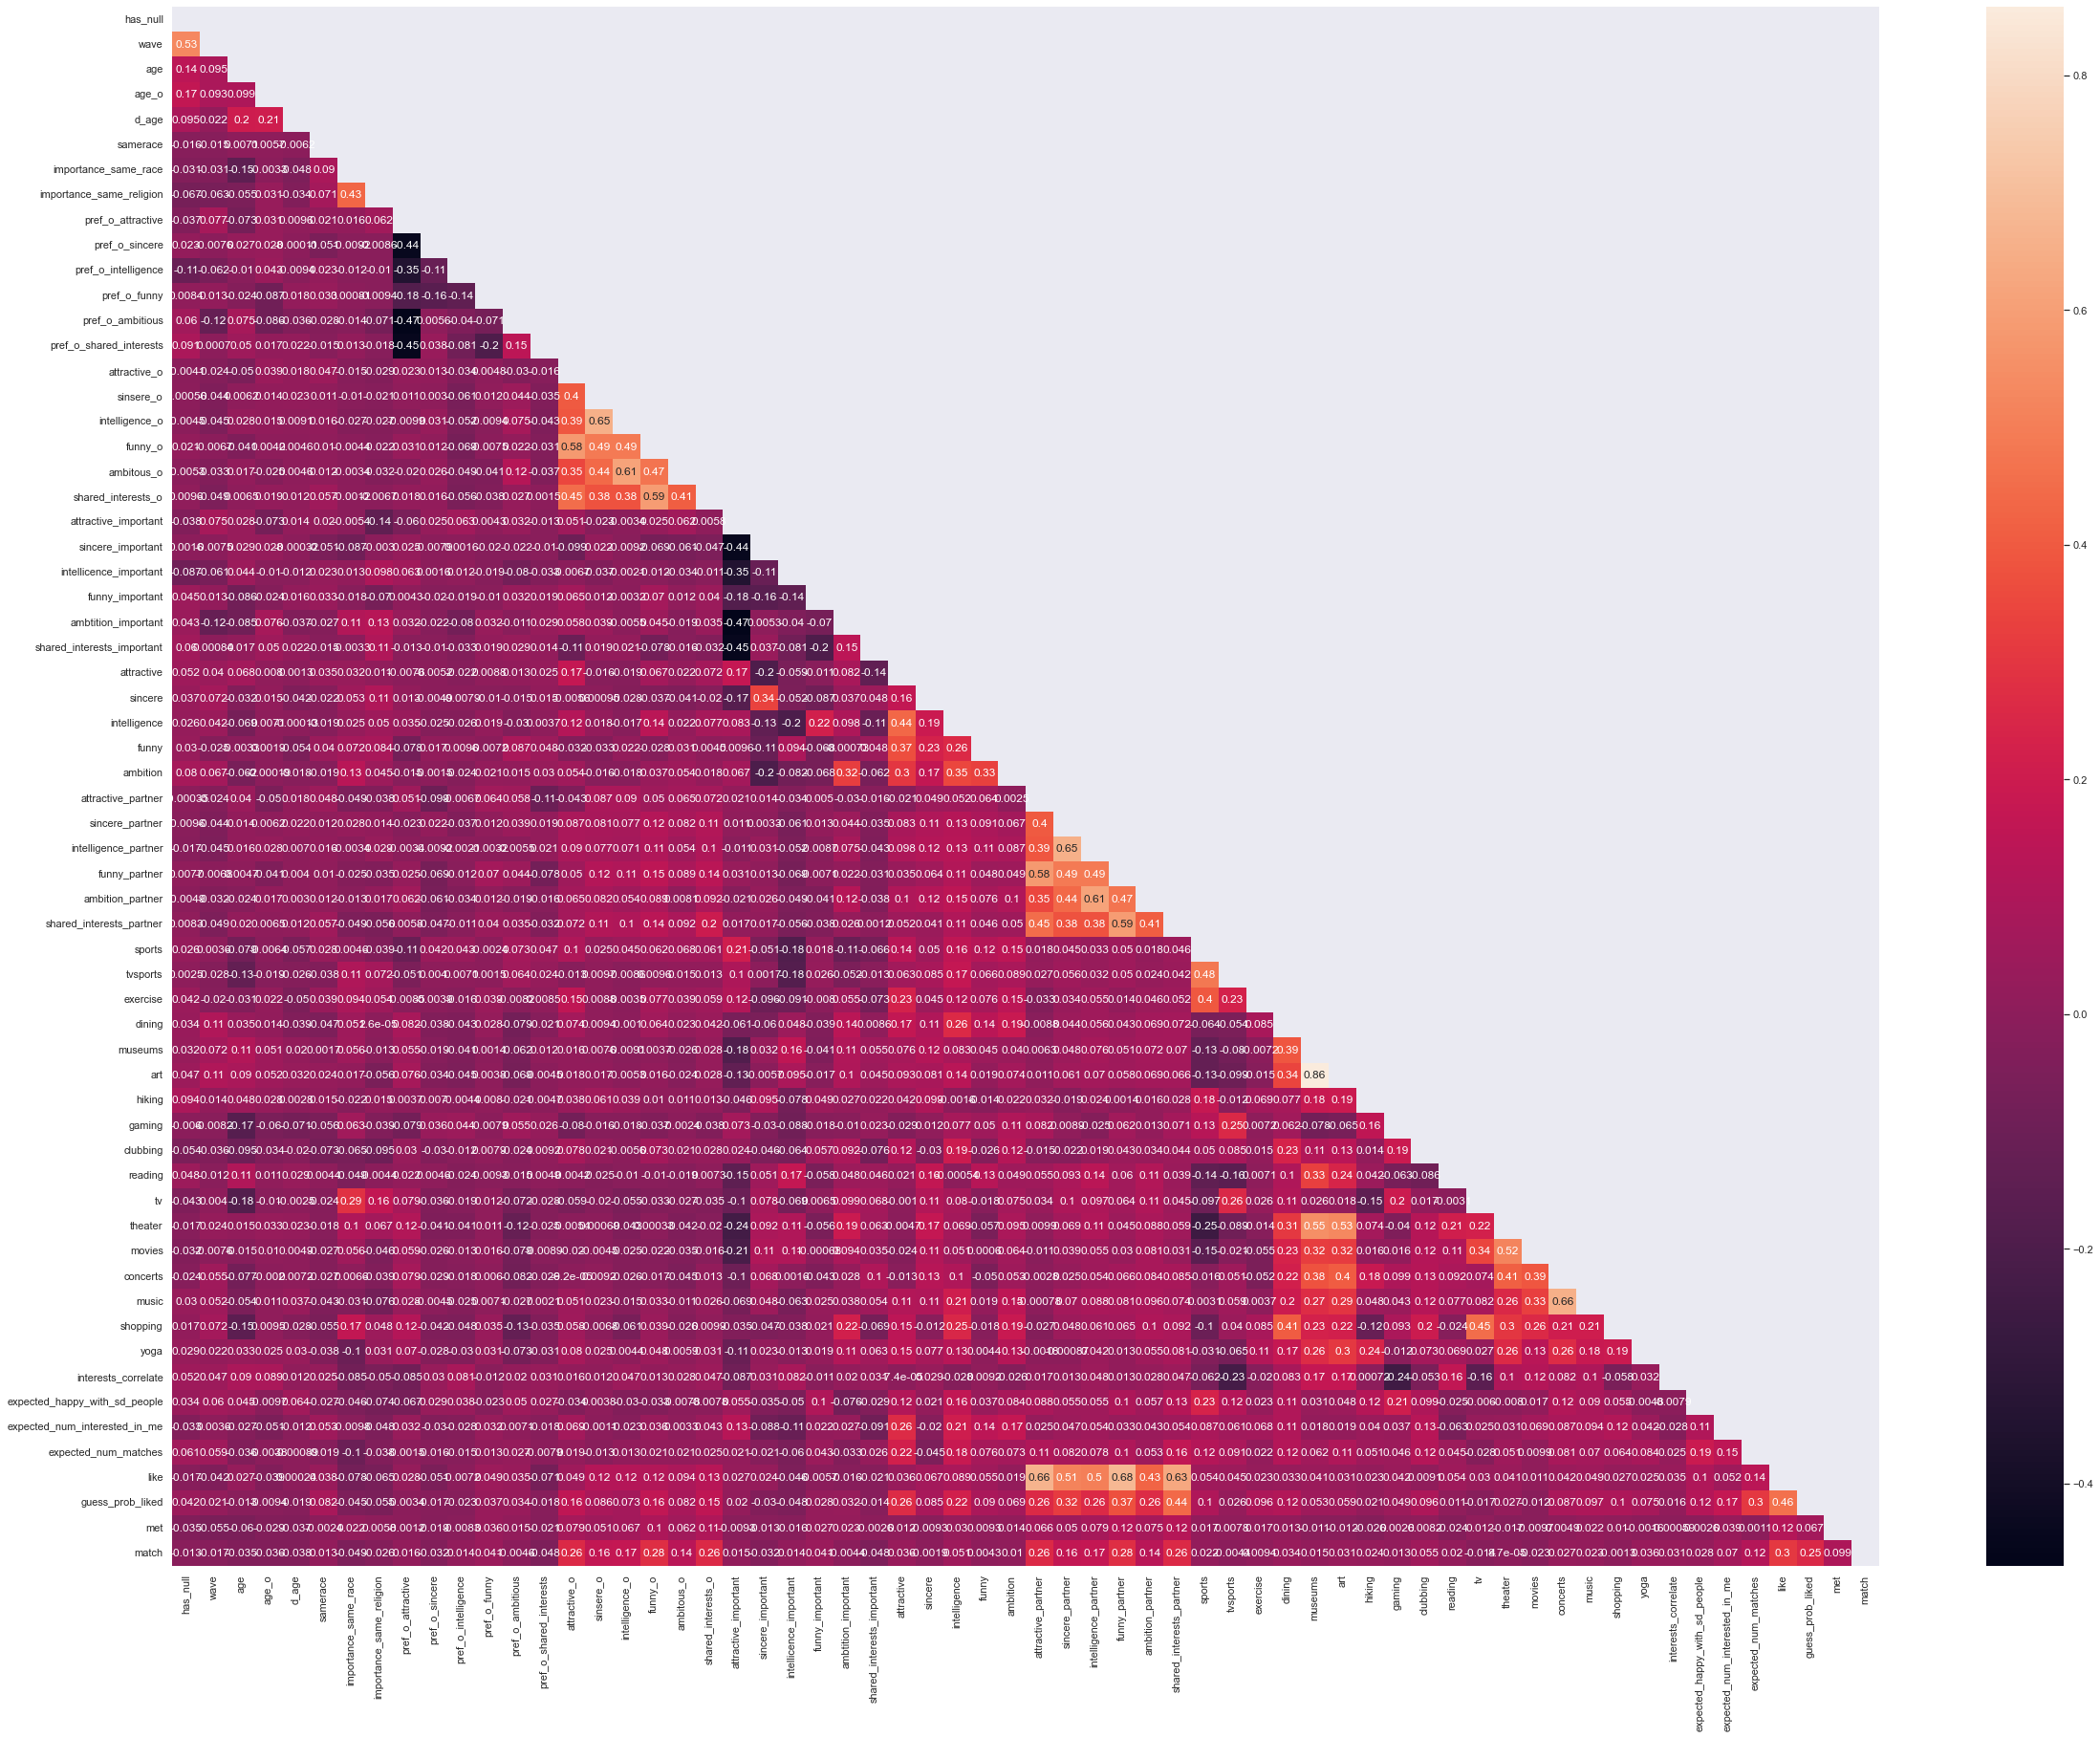

In [33]:
sns.set(rc = {'figure.figsize':(40,30)})
sns.heatmap(corr_matrix, annot=True)
plt.show()

While there aren't any features that direcly correlate strongly with `match`, we can see that there are a few strongly correlated features (such as `museums` and `art`) and there are some interesting clusters, such as the features that correlate with `like` and the ratings of each person according to their date.

# Validation framework & one-hot encoding

In [34]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

#df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

#y_full_train = df_full_train.values
y_train = df_train.match.values
y_val = df_val.match.values
y_test = df_test.match.values

#del df_full_train['match']
del df_train['match']
del df_val['match']
del df_test['match']

In [35]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)


# Decision Tree Model

## Basic DT model

In [36]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6319415560177037

In [38]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- like <= 6.32
|   |--- funny_o <= 6.70
|   |   |--- art <= 0.50
|   |   |   |--- class: 1
|   |   |--- art >  0.50
|   |   |   |--- shared_interests_partner <= 8.50
|   |   |   |   |--- field=money <= 0.50
|   |   |   |   |   |--- intelligence_o <= 7.75
|   |   |   |   |   |   |--- field=neuroscience_and_education <= 0.50
|   |   |   |   |   |   |   |--- field=business_and_international_affairs_(mba/mia_dual_degree) <= 0.50
|   |   |   |   |   |   |   |   |--- pref_o_intelligence <= 47.50
|   |   |   |   |   |   |   |   |   |--- field=health_policy <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- attractive_o <= 9.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- attractive_o >  9.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- field=health_policy >  0.50
|   |   |   |   |   |   |   |   |   |   |--- sinsere_o <= 6.50
|   |   |   |  

/Users/ziri/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [40]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7714200395877415
val: 0.7622447075134645


In [41]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- like <= 6.32
|   |--- funny_o <= 6.70
|   |   |--- class: 0
|   |--- funny_o >  6.70
|   |   |--- class: 0
|--- like >  6.32
|   |--- attractive_o <= 6.75
|   |   |--- class: 0
|   |--- attractive_o >  6.75
|   |   |--- class: 0



/Users/ziri/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


We can see that a simple tree of max depth 2 has a better AUC score than a tree with unlimited depth. Let's finetune it.

## Decision Tree model finetuning

We will finetune the `max_depth` and the `min_samples_leaf` hyperparameters.

In [42]:
scores = []

for depth in tqdm([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 30, 40, 60, None]):
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((depth, s, auc))

100%|██████████| 17/17 [00:07<00:00,  2.34it/s]


In [43]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                   \
max_depth           NaN   1.0    2.0    3.0    4.0    5.0    6.0    7.0    
min_samples_leaf                                                           
1                 0.637  0.676  0.762  0.800  0.796  0.798  0.784  0.766   
5                 0.660  0.676  0.762  0.800  0.795  0.792  0.773  0.758   
10                0.720  0.676  0.762  0.802  0.796  0.788  0.773  0.755   
15                0.758  0.676  0.762  0.802  0.799  0.786  0.773  0.768   
20                0.742  0.676  0.762  0.799  0.795  0.786  0.767  0.757   
100               0.799  0.676  0.762  0.799  0.806  0.791  0.799  0.799   
200               0.809  0.676  0.762  0.805  0.811  0.810  0.809  0.809   
500               0.799  0.676  0.762  0.799  0.799  0.799  0.799  0.799   

                                                                          \
max_depth          8.0    9.0    10.0   12.0   15.0   20.0   30.0   40.0   
min_samples_leaf                                                           
1                 0.753  0.710  0.649  0.574  0.565  0.565  0.621  0.623   
5                 0.727  0.700  0.645  0.629  0.654  0.661  0.649  0.659   
10                0.730  0.707  0.691  0.692  0.709  0.716  0.719  0.709   
15                0.766  0.743  0.748  0.756  0.758  0.748  0.753  0.752   
20                0.750  0.743  0.739  0.751  0.743  0.747  0.751  0.742   
100               0.799  0.800  0.799  0.800  0.800  0.800  0.799  0.800   
200               0.809  0.809  0.809  0.809  0.809  0.809  0.809  0.809   
500               0.799  0.799  0.799  0.799  0.799  0.799  0.799  0.799   

                         
max_depth          60.0  
min_samples_leaf         
1                 0.625  
5                 0.666  
10                0.714  
15                0.750  
20                0.751  
100               0.799  
200               0.809  
500               0.799

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

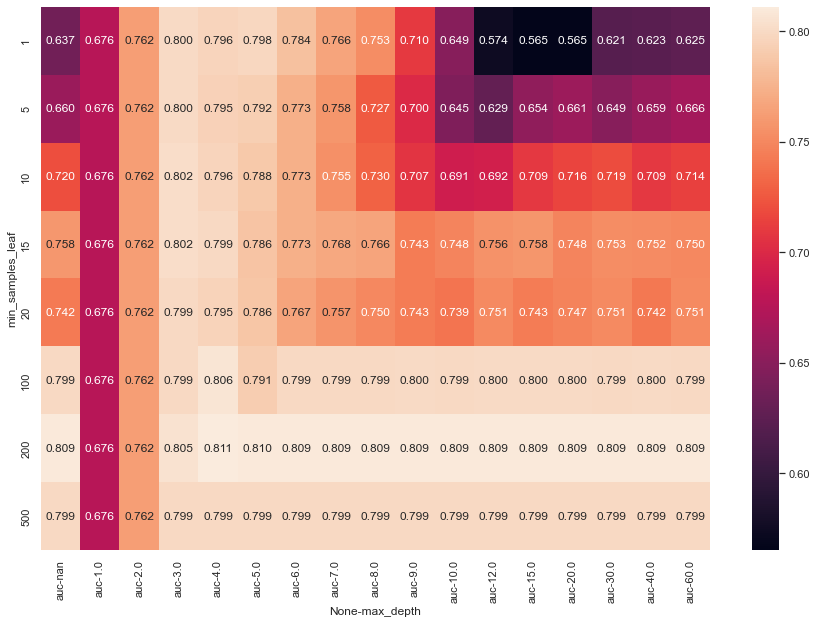

In [44]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

It seems that the best score was achieved with a `max_depth` of `4` and a `min_samples_leaf` of 200.

As a conclusion, we've managed to obtain an AUC score of `0.811` with a Decision Tree Classifier model.

In [45]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=200)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
print('Decission Tree Classifier model')
print(f'ROC AUC score: {roc_auc_score(y_val, y_pred)}')

Decission Tree Classifier model
ROC AUC score: 0.8110155708419987


In [46]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- like <= 6.32
|   |--- funny_o <= 6.70
|   |   |--- guess_prob_liked <= 5.60
|   |   |   |--- intelligence_o <= 7.75
|   |   |   |   |--- class: 0
|   |   |   |--- intelligence_o >  7.75
|   |   |   |   |--- class: 0
|   |   |--- guess_prob_liked >  5.60
|   |   |   |--- class: 0
|   |--- funny_o >  6.70
|   |   |--- attractive_partner <= 5.50
|   |   |   |--- funny_partner <= 5.50
|   |   |   |   |--- class: 0
|   |   |   |--- funny_partner >  5.50
|   |   |   |   |--- class: 0
|   |   |--- attractive_partner >  5.50
|   |   |   |--- shared_interests_partner <= 5.74
|   |   |   |   |--- class: 0
|   |   |   |--- shared_interests_partner >  5.74
|   |   |   |   |--- class: 0
|--- like >  6.32
|   |--- attractive_o <= 6.75
|   |   |--- shared_interests_o <= 5.74
|   |   |   |--- funny_o <= 5.75
|   |   |   |   |--- class: 0
|   |   |   |--- funny_o >  5.75
|   |   |   |   |--- class: 0
|   |   |--- shared_interests_o >  5.74
|   |   |   |--- pref_o_funny <= 18.68
|   |   |   |   |--

/Users/ziri/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Decision Tree model cross-validation

In [47]:
# Auxiliary functions
def train_dt(df_train_k, y_train_k):
    dict_k = df_train_k.to_dict(orient='records')

    dv_k = DictVectorizer(sparse=False)
    X_train_k = dv_k.fit_transform(dict_k)

    model_k = DecisionTreeClassifier(max_depth=4, min_samples_leaf=200)
    model_k.fit(X_train_k, y_train_k)
    
    return dv_k, model_k

def predict_dt(df_k, dv_k, model_k):
    dict_k = df_k.to_dict(orient='records')

    X_k = dv_k.transform(dict_k)
    y_pred_k = model_k.predict_proba(X_k)[:, 1]

    return y_pred_k

In [48]:
n_splits = 5

scores = []

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train_k = df_full_train.iloc[train_idx]
    df_val_k = df_full_train.iloc[val_idx]

    y_train_k = df_train_k.match.values
    y_val_k = df_val_k.match.values

    del df_train_k['match']
    del df_val_k['match']

    dv_k, model_k = train_dt(df_train_k, y_train_k)
    y_pred_k = predict_dt(df_val_k, dv_k, model_k)

    auc = roc_auc_score(y_val_k, y_pred_k)
    scores.append(auc)

In [49]:
print(scores)
print(f'Scores mean: {np.mean(scores)}')
print(f'Scores standard deviation: {np.std(scores)}')

[0.8097827454598835, 0.8229937538189966, 0.8197384632616488, 0.7982822528849504, 0.8241202731092439]
Scores mean: 0.8149834977069446
Scores standard deviation: 0.00975944637465314


# Random Forest

## Basic model

Let's begin with a default RF model.

In [50]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8425358609289179

The default value for `n_estimators` is `100`. Let's continue by finetuning `n_estimators` next.

## Random Forest Model Finetuning

In [51]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [52]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

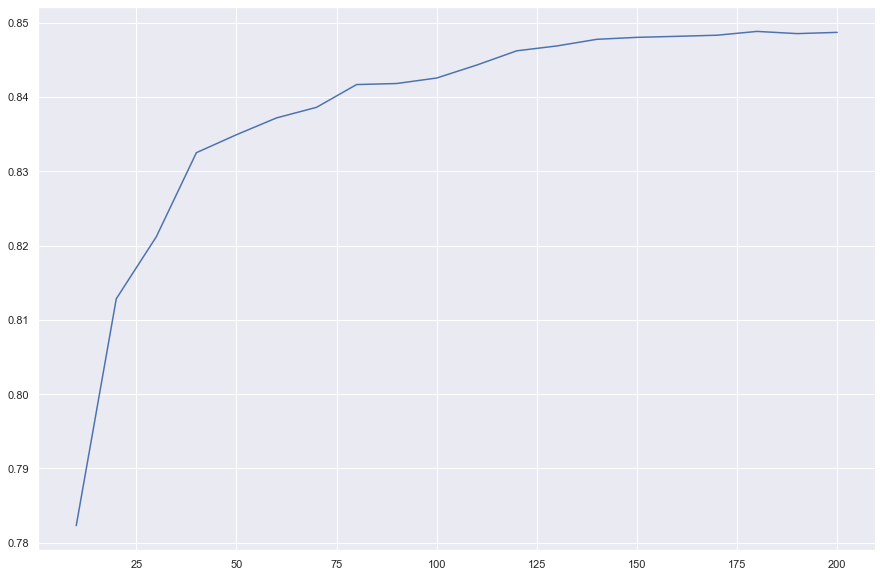

In [53]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [54]:
df_scores[df_scores.auc == df_scores.auc.max()]

,n_estimators,auc
17,180,0.848807


Our best amount of `n_estimators` was `180`. Let's train a single model with that amount of estimators and check the depths of the threes.

In [55]:
rf = RandomForestClassifier(n_estimators=180, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8488068575694556

In [56]:
[estimator.tree_.max_depth for estimator in rf.estimators_]

[22,
 22,
 23,
 30,
 24,
 28,
 28,
 24,
 28,
 25,
 28,
 25,
 25,
 26,
 22,
 27,
 24,
 26,
 24,
 26,
 23,
 22,
 24,
 20,
 26,
 23,
 23,
 23,
 31,
 27,
 22,
 27,
 22,
 22,
 26,
 23,
 21,
 29,
 24,
 25,
 23,
 22,
 33,
 24,
 30,
 24,
 27,
 22,
 23,
 24,
 24,
 26,
 23,
 24,
 22,
 25,
 22,
 22,
 26,
 30,
 26,
 24,
 27,
 27,
 32,
 23,
 27,
 24,
 27,
 26,
 28,
 23,
 24,
 24,
 26,
 30,
 21,
 26,
 24,
 22,
 25,
 29,
 27,
 24,
 22,
 24,
 22,
 28,
 24,
 21,
 29,
 28,
 23,
 25,
 29,
 26,
 23,
 21,
 26,
 27,
 24,
 25,
 22,
 23,
 25,
 24,
 24,
 22,
 26,
 28,
 24,
 23,
 21,
 28,
 26,
 23,
 27,
 26,
 28,
 30,
 21,
 23,
 28,
 23,
 22,
 26,
 27,
 27,
 22,
 21,
 26,
 24,
 22,
 29,
 24,
 22,
 28,
 21,
 31,
 25,
 32,
 24,
 27,
 24,
 27,
 25,
 26,
 23,
 26,
 26,
 27,
 26,
 24,
 24,
 26,
 26,
 26,
 24,
 26,
 21,
 26,
 23,
 24,
 24,
 29,
 26,
 27,
 26,
 26,
 23,
 22,
 23,
 29,
 23,
 26,
 24,
 25,
 22,
 28,
 25]

In [57]:
X_train.shape

(5026, 280)

The depths of the trees oscillate between 20 and 30. We have 280 features. Let's use these values to finetune the depth.

In [58]:
scores = []

for d in tqdm(range(1, 60, 1)):
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))


100%|██████████| 59/59 [04:07<00:00,  4.20s/it]


In [59]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [60]:
df_scores[df_scores.auc == df_scores.auc.max()]

,max_depth,n_estimators,auc
296,15,170,0.854989


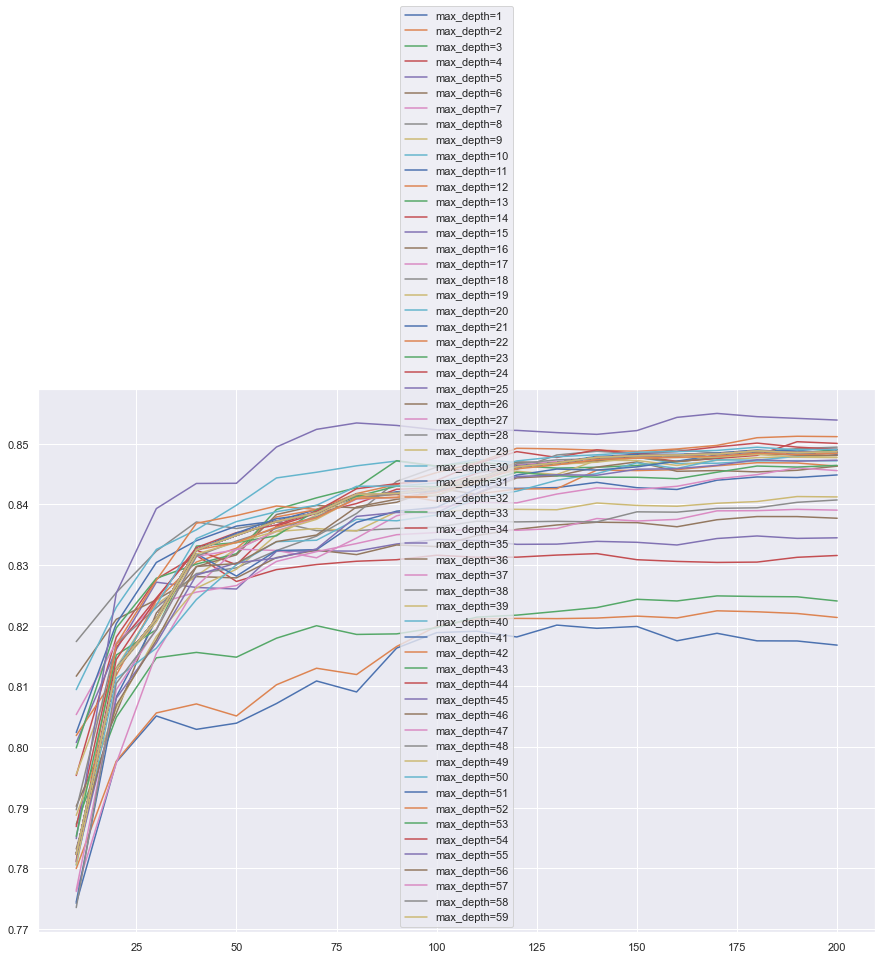

In [61]:
for d in range(1, 60, 1):
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)

plt.legend()

We've found that by reducing the depth, we can find better scores with a lower number of estimators. Also, we can safely drop max_depths lower than 10. Interestingly, we've reduced the number of estimators from `180` to `170`.

Let's keep `max_depth = 15` and finetune `min_samples_leaf`.

In [62]:
scores = []

max_depth = 15

for s in tqdm( range(1, 200, 2) ):
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=s, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

100%|██████████| 100/100 [05:53<00:00,  3.53s/it]


In [63]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [64]:
df_scores[df_scores.auc == df_scores.auc.max()]

,min_samples_leaf,n_estimators,auc
16,1,170,0.854989


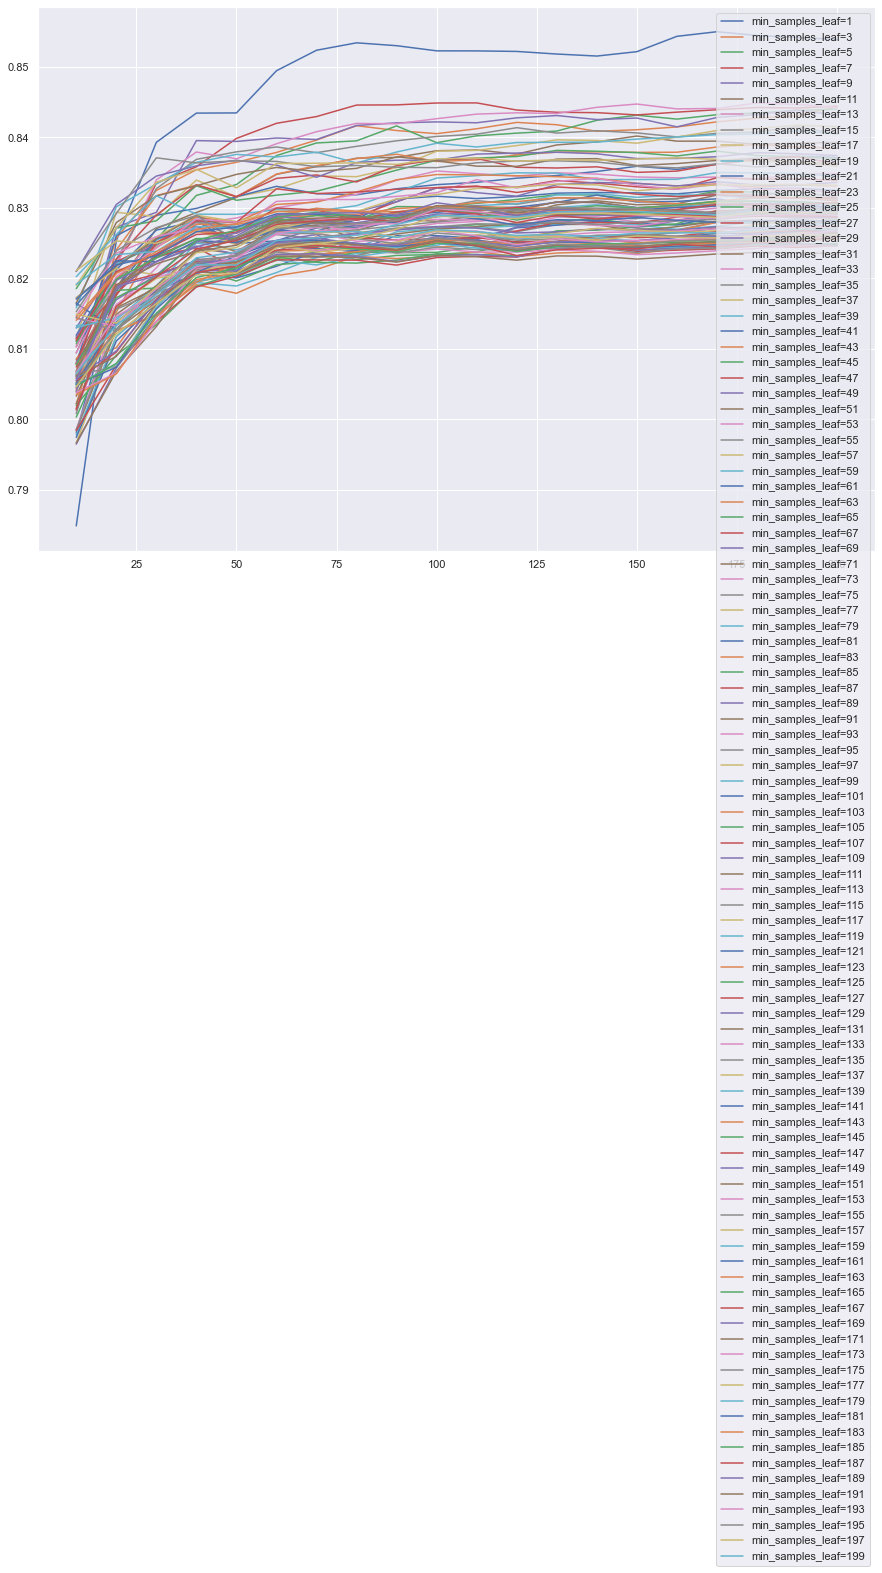

In [65]:
for s in range(1, 200, 2):
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(df_subset.n_estimators, df_subset.auc, label='min_samples_leaf=%s' % s)

plt.legend()

It seems that tuning `min_samples_leaf` doesn't really contribute to better results and the default value of `1` is already the best value possible.

The conclusion is that we've managed to improve on our previous model with this Random Forest model, with an AUC score of `0.855`

In [66]:
rf = RandomForestClassifier(n_estimators=170, max_depth=15, min_samples_leaf=1, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
print('Random Forest Classifier model')
print(f'ROC AUC score: {roc_auc_score(y_val, y_pred)}')

Random Forest Classifier model
ROC AUC score: 0.8549885351677065


## Random Forest cross-validation

In [67]:
# Auxiliary functions
def train_rf(df_train_k, y_train_k):
    dict_k = df_train_k.to_dict(orient='records')

    dv_k = DictVectorizer(sparse=False)
    X_train_k = dv_k.fit_transform(dict_k)

    model_k = RandomForestClassifier(n_estimators=170, max_depth=15, min_samples_leaf=1, random_state=1, n_jobs=-1)
    model_k.fit(X_train_k, y_train_k)
    
    return dv_k, model_k

def predict_rf(df_k, dv_k, model_k):
    dict_k = df_k.to_dict(orient='records')

    X_k = dv_k.transform(dict_k)
    y_pred_k = model_k.predict_proba(X_k)[:, 1]

    return y_pred_k

In [68]:
n_splits = 5

scores = []

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train_k = df_full_train.iloc[train_idx]
    df_val_k = df_full_train.iloc[val_idx]

    y_train_k = df_train_k.match.values
    y_val_k = df_val_k.match.values

    del df_train_k['match']
    del df_val_k['match']

    dv_k, model_k = train_rf(df_train_k, y_train_k)
    y_pred_k = predict_rf(df_val_k, dv_k, model_k)

    auc = roc_auc_score(y_val_k, y_pred_k)
    scores.append(auc)

In [69]:
print(scores)
print(f'Scores mean: {np.mean(scores)}')
print(f'Scores standard deviation: {np.std(scores)}')

[0.838921276684981, 0.8752843030755653, 0.8654713901689709, 0.835861119390141, 0.8618551587301587]
Scores mean: 0.8554786496099634
Scores standard deviation: 0.015438735257407993


# Gradient Boosting model

## Basic Gradient Boosting Model

Let's try a Gradient Boosting model as our final model and see how it compares to the others.

In [70]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [71]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

/Users/ziri/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [72]:
xgb_params = {
    'eta': 0.3, #default
    'max_depth': 6, #default
    'min_child_weight': 1, # default
    
    'objective': 'binary:logistic',
    #'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}


In [73]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

[19:34:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [74]:
y_pred = model.predict(dval)

In [75]:
roc_auc_score(y_val, y_pred)

0.8544326241134752

Our very first XGBoost model gets an AUC score of `0.854` with 10 boosting rounds. Let's increase the number of rounds and see how it performs with a watchlist.

## Gradient Boosting Model finetuning

In [76]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [77]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [78]:
df_score = parse_xgb_output(output)

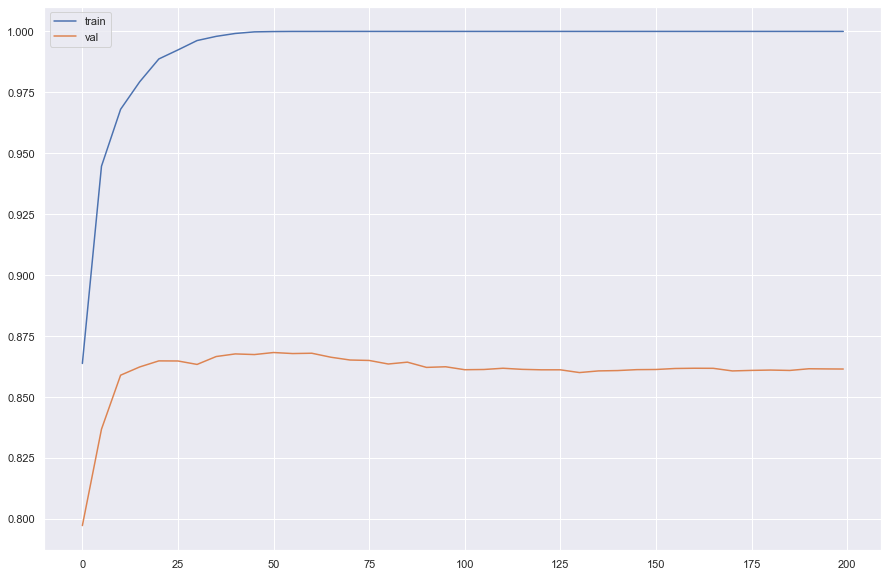

In [79]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

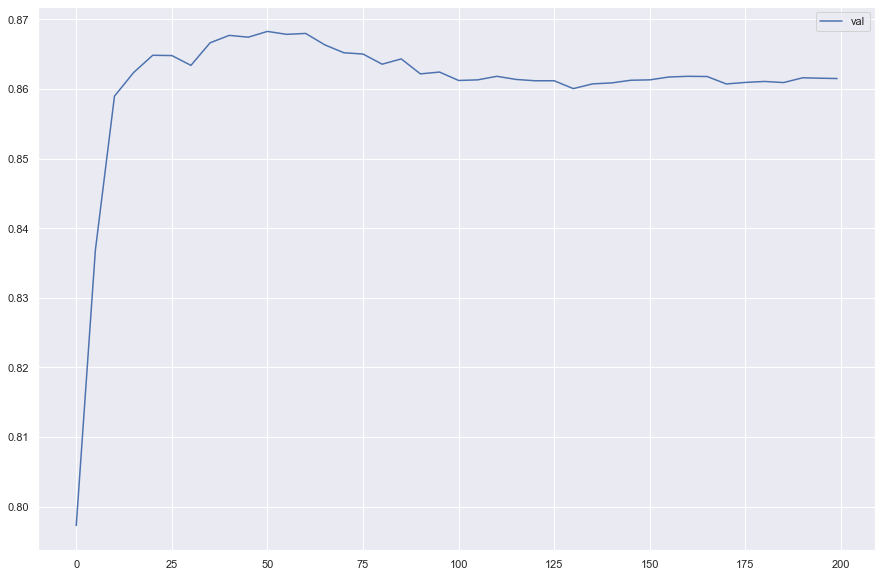

In [80]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [81]:
df_score[df_score.val_auc == df_score.val_auc.max()]

,num_iter,train_auc,val_auc
10,50,0.99994,0.86826


It seems that the best AUC score (`0.868`) was achieved after 50 boosting rounds. Let's finetune it further, beginning with `eta`.

***IMPORTANT***: please run the following cells in a row.

In [82]:
scores = {}
etas = [0.01, 0.1, 0.3, 0.5, 1]

In [83]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)



In [84]:
key = f'eta={etas[0]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.01


In [85]:
%%capture output

xgb_params['eta'] = etas[1]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)


In [86]:
key = f'eta={etas[1]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.1


In [87]:
%%capture output

xgb_params['eta'] = etas[2]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [88]:
key = f'eta={etas[2]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.3


In [89]:
%%capture output

xgb_params['eta'] = etas[3]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [90]:
key = f'eta={etas[3]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.5


In [91]:
%%capture output

xgb_params['eta'] = etas[4]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [92]:
key = f'eta={etas[4]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=1


In [93]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.1', 'eta=0.3', 'eta=0.5', 'eta=1'])

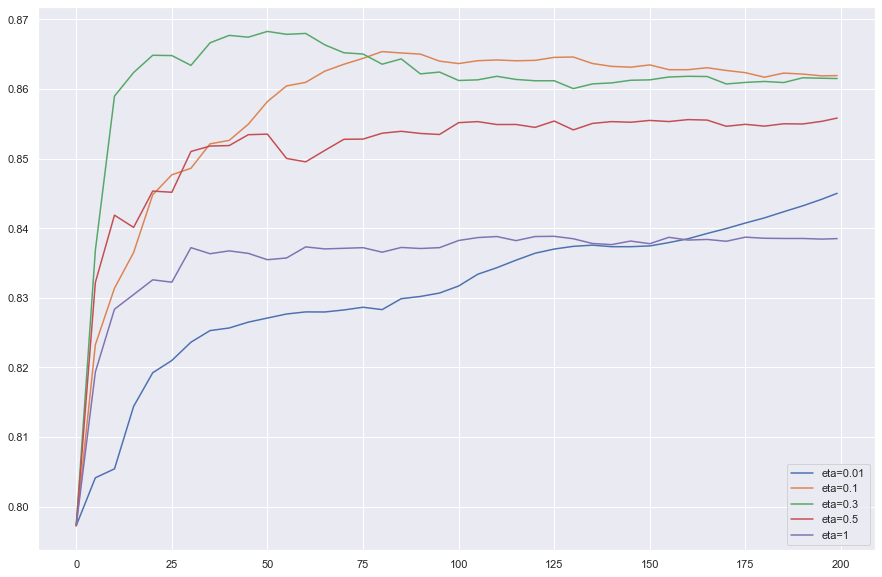

In [94]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

In [95]:
df_score = scores['eta=0.3']
df_score[df_score.val_auc == df_score.val_auc.max()]

,num_iter,train_auc,val_auc
10,50,0.99994,0.86826


The default `eta` value of `0.3` turned out to be the best. Let's finetune `max_depth` now.

In [96]:
scores = {}
depths = [1, 2, 4, 6, 8, 10, 12, 15, 18, 20]

In [97]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 1,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [98]:
key = f'max_depth={depths[0]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=1


In [99]:
%%capture output

xgb_params['max_depth'] = depths[1]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [100]:
key = f'max_depth={depths[1]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=2


In [101]:
%%capture output

xgb_params['max_depth'] = depths[2]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [102]:
key = f'max_depth={depths[2]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=4


In [103]:
%%capture output
xgb_params['max_depth'] = depths[3]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [104]:
key = f'max_depth={depths[3]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=6


In [105]:
%%capture output
xgb_params['max_depth'] = depths[4]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [106]:
key = f'max_depth={depths[4]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=8


In [107]:
%%capture output
xgb_params['max_depth'] = depths[5]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [108]:
key = f'max_depth={depths[5]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=10


In [109]:
%%capture output
xgb_params['max_depth'] = depths[6]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [110]:
key = f'max_depth={depths[6]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=12


In [111]:
%%capture output
xgb_params['max_depth'] = depths[7]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [112]:
key = f'max_depth={depths[7]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=15


In [113]:
%%capture output
xgb_params['max_depth'] = depths[8]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [114]:
key = f'max_depth={depths[8]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=18


In [115]:
%%capture output
xgb_params['max_depth'] = depths[9]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [116]:
key = f'max_depth={depths[9]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=20


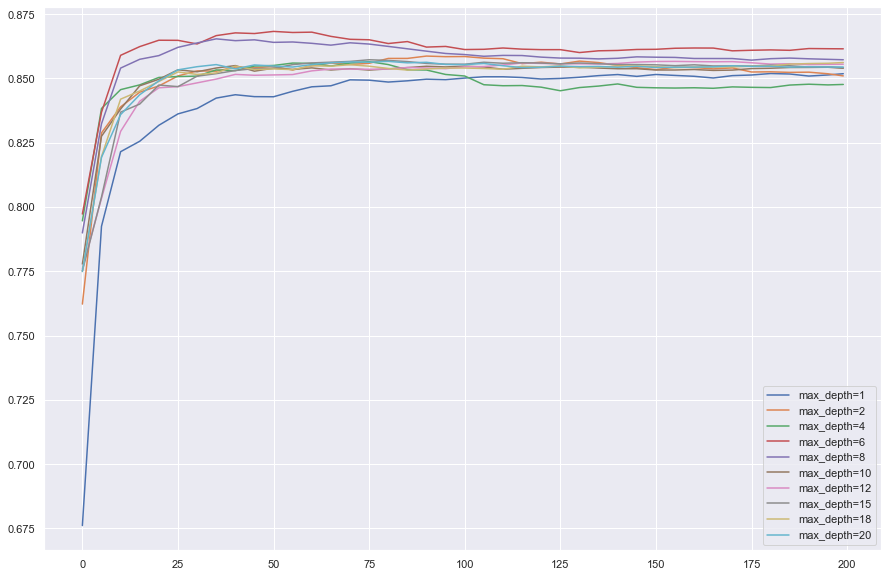

In [117]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

In [118]:
df_score = scores['max_depth=6']
df_score[df_score.val_auc == df_score.val_auc.max()]

,num_iter,train_auc,val_auc
10,50,0.99994,0.86826


Once again, the default value for the hyperparameter turned out to be the best one. Let's finish our finetuning with `min_child_weight`.

In [119]:
scores = {}
weights = [1, 2, 5, 10, 15, 20, 30, 40]

In [120]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [121]:
key = f'min_child_weight={weights[0]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = min_child_weight=1


In [122]:
%%capture output
xgb_params['min_child_weight'] = weights[1]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [123]:
key = f'min_child_weight={weights[1]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = min_child_weight=2


In [124]:
%%capture output
xgb_params['min_child_weight'] = weights[2]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [125]:
key = f'min_child_weight={weights[2]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = min_child_weight=5


In [126]:
%%capture output
xgb_params['min_child_weight'] = weights[3]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [127]:
key = f'min_child_weight={weights[3]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = min_child_weight=10


In [128]:
%%capture output
xgb_params['min_child_weight'] = weights[4]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [129]:
key = f'min_child_weight={weights[4]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = min_child_weight=15


In [130]:
%%capture output
xgb_params['min_child_weight'] = weights[5]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [131]:
key = f'min_child_weight={weights[5]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = min_child_weight=20


In [132]:
%%capture output
xgb_params['min_child_weight'] = weights[6]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [133]:
key = f'min_child_weight={weights[6]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = min_child_weight=30


In [134]:
%%capture output
xgb_params['min_child_weight'] = weights[7]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [135]:
key = f'min_child_weight={weights[7]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = min_child_weight=40


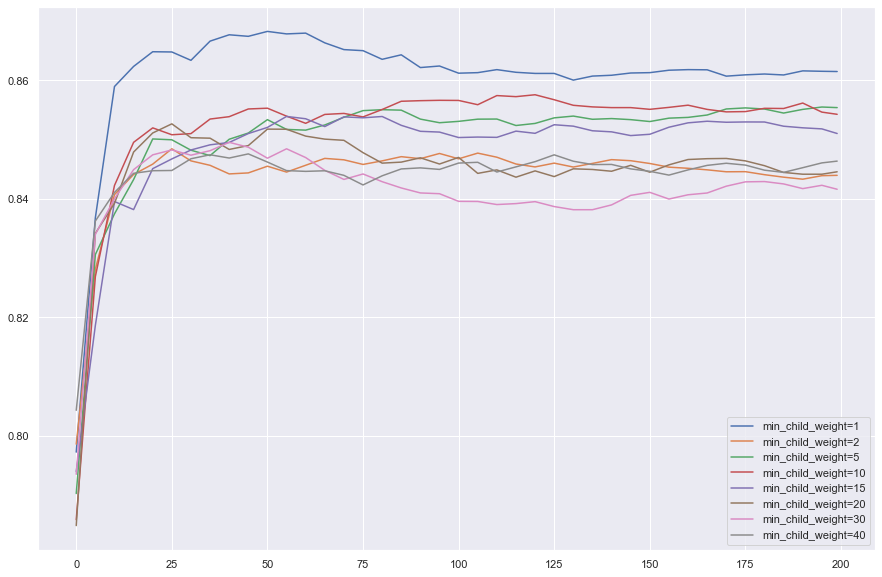

In [136]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

In [137]:
df_score = scores['min_child_weight=1']
df_score[df_score.val_auc == df_score.val_auc.max()]

,num_iter,train_auc,val_auc
10,50,0.99994,0.86826


We can finally conclude that the default values for all hyperparameters get the best results.

In [138]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=50)
y_pred = model.predict(dval)
print('Gradient Boosting Model')
print(f'ROC AUC score: {roc_auc_score(y_val, y_pred)}')

Gradient Boosting Model
ROC AUC score: 0.8682317495867329


## Gradient Boosting cross-validation

In [139]:
# Auxiliary functions
def train_gb(df_train_k, y_train_k, xgb_params_k):
    dict_k = df_train_k.to_dict(orient='records')

    dv_k = DictVectorizer(sparse=False)

    X_train_k = dv_k.fit_transform(dict_k)

    features_k = dv_k.get_feature_names()

    dtrain_k = xgb.DMatrix(X_train_k, label=y_train_k, feature_names=features_k)

    model_k = xgb.train(xgb_params_k, dtrain_k, num_boost_round=50)
    
    return dv_k, features_k, model_k

def predict_gb(df_k, y_val_k, dv_k, features_k, model_k):
    dict_k = df_k.to_dict(orient='records')

    X_k = dv_k.transform(dict_k)

    dval_k = xgb.DMatrix(X_k, label=y_val_k, feature_names=features_k)

    y_pred_k = model_k.predict(dval_k)

    return y_pred_k

In [140]:
n_splits = 5

scores = []

xgb_params_k = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train_k = df_full_train.iloc[train_idx]
    df_val_k = df_full_train.iloc[val_idx]

    y_train_k = df_train_k.match.values
    y_val_k = df_val_k.match.values

    del df_train_k['match']
    del df_val_k['match']

    dv_k, features_k, model_k = train_gb(df_train_k, y_train_k, xgb_params_k)
    y_pred_k = predict_gb(df_val_k, y_val_k, dv_k, features_k, model_k)

    auc = roc_auc_score(y_val_k, y_pred_k)
    scores.append(auc)

/Users/ziri/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/ziri/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/ziri/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/ziri/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/

In [141]:
print(scores)
print(f'Scores mean: {np.mean(scores)}')
print(f'Scores standard deviation: {np.std(scores)}')

[0.8398775321897411, 0.8719787494059339, 0.8599350358422939, 0.8510362313669354, 0.8638794059290382]
Scores mean: 0.8573413909467884
Scores standard deviation: 0.011031466778512558


# Deciding on the model

Here are our 3 models:

* Decision tree model
    * Initial ROC AUC score of `0.811`
    * Cross validation mean ROC AUC score of `0.815`
    * Cross validation standard deviation of ROC AUC score of `0.01`
* Random Forest
    * Initial ROC AUC score of `0.855`
    * Cross validation mean ROC AUC score of `0.855`
    * Cross validation standard deviation of ROC AUC score of `0.015`
* Gradient Boosting
    * Initial ROC AUC score of `0.868`
    * Cross validation mean ROC AUC score of `0.857`
    * Cross validation standard deviation of ROC AUC score of `0.011`

Based on this info, it seems that the Gradient Boosting model is the best one, but we need to train these 3 models with our final full train dataset and test them with the test dataset.

In [142]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train.match.values
del df_full_train['match']

In [143]:
dict_final = df_full_train.to_dict(orient='records')

dv_final = DictVectorizer(sparse=False)

X_full_train = dv_final.fit_transform(dict_final)

In [145]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=dv_final.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv_final.get_feature_names())

/Users/ziri/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [146]:
# Decision tree
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=200)
dt.fit(X_full_train, y_full_train)
y_pred = dt.predict_proba(X_test)[:, 1]
print('Decission Tree Classifier model')
print(f'ROC AUC score: {roc_auc_score(y_test, y_pred)}')

Decission Tree Classifier model
ROC AUC score: 0.8210624550954321


In [147]:
# Random forest
rf = RandomForestClassifier(n_estimators=170, max_depth=15, min_samples_leaf=1, random_state=1, n_jobs=-1)
rf.fit(X_full_train, y_full_train)
y_pred = rf.predict_proba(X_test)[:, 1]
print('Random Forest Classifier model')
print(f'ROC AUC score: {roc_auc_score(y_test, y_pred)}')

Random Forest Classifier model
ROC AUC score: 0.8544180888615847


In [148]:
# Gradient Boosting

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dfulltrain, num_boost_round=50)
y_pred = model.predict(dtest)
print('Gradient Boosting Model')
print(f'ROC AUC score: {roc_auc_score(y_test, y_pred)}')

Gradient Boosting Model
ROC AUC score: 0.8753943792496641


## Final conclusion

The best model for this problem is the Gradient Boosting model.